In [3]:
import random
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from collections import Counter

SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def cosine_sim(a, b):
    a = a / (np.linalg.norm(a) + 1e-9)
    b = b / (np.linalg.norm(b) + 1e-9)
    return float(np.dot(a, b))

In [7]:
# Training texts
train_texts = [
    # Sports (100 samples) - Label 0
    "Lakers win championship after amazing comeback",
    "Football team scores three goals in final match",
    "Tennis star wins grand slam tournament",
    "Olympic athlete breaks world record",
    "Basketball game ends in dramatic overtime",
    "Soccer team advances to finals",
    "Runner wins marathon in record time",
    "Baseball team clinches playoff spot",
    "Swimmer wins gold medal at Olympics",
    "Hockey team defeats rival in shootout",
    "Gymnast performs perfect routine at competition",
    "Boxer wins title fight in final round",
    "Cycling champion wins Tour de France stage",
    "Golfer sinks incredible putt to win tournament",
    "Figure skater lands difficult jump perfectly",
    "Wrestling champion defends title successfully",
    "Cricket team wins test match series",
    "Rugby team scores last minute try",
    "Volleyball team wins championship match",
    "Badminton player wins international tournament",
    "Team celebrates victory after tough game",
    "Players train hard for upcoming season",
    "Coach announces new strategy for playoffs",
    "Stadium packed with fans for final game",
    "Athletes compete in regional championship",
    "Team captain leads squad to victory",
    "Young player shows great potential",
    "Fans celebrate team winning streak",
    "Manager signs new contract with club",
    "Training camp begins for new season",
    "Team wins away game against rivals",
    "Player receives award for performance",
    "Championship game draws huge crowd",
    "Team prepares for important match",
    "Coach praises players after victory",
    "Athletes set new records at event",
    "Team qualifies for next round",
    "Player scores hat trick in match",
    "Championship trophy awarded to winners",
    "Team celebrates historic achievement",
    "Players excited for tournament start",
    "Coach announces starting lineup today",
    "Team practices before big game",
    "Victory parade celebrates championship win",
    "Players sign autographs for fans",
    "Team mascot entertains crowd at game",
    "Championship banner raised at stadium",
    "Team dominates in playoff series",
    "Player injury sidelines star athlete",
    "Team rebuilds roster for season",
    "Coach implements new training program",
    "Players bond during team retreat",
    "Stadium renovations completed for season",
    "Team announces ticket prices for games",
    "Player traded to rival team",
    "Coach resigns after disappointing season",
    "Team practices penalty kicks for game",
    "Championship ring ceremony held today",
    "Team wins tournament in overtime",
    "Player breaks scoring record in game",
    "Coach gives motivational speech to team",
    "Team celebrates winning season finale",
    "Athletes train for upcoming competition",
    "Player signs endorsement deal today",
    "Team unveils new uniform design",
    "Championship parade draws massive crowd",
    "Coach analyzes game film with players",
    "Team defeats defending champions convincingly",
    "Player receives sportsmanship award today",
    "Team holds charity event for fans",
    "Athletes prepare for championship match",
    "Coach praises team effort after win",
    "Team advances in tournament bracket",
    "Player scores winning goal in match",
    "Championship celebrations continue all week",
    "Team announces preseason schedule today",
    "Players work hard during practice",
    "Coach happy with team performance",
    "Team wins decisive game at home",
    "Athletes excited for season opener",
    "Player makes incredible save in game",
    "Team rallies from behind for victory",
    "Coach confident before important match",
    "Championship run inspires young athletes",
    "Team prepares strategy for rivals",
    "Player demonstrates leadership on field",
    "Team celebrates milestone victory today",
    "Coach reviews tactics with players",
    "Athletes compete in regional finals",
    "Player achieves personal best in event",
    "Team practices formations for game",
    "Championship trophy displayed at stadium",
    "Coach motivates team before playoffs",
    "Team wins thrilling match in finale",
    "Player earns spot on national team",
    "Athletes train for international competition",
    "Team holds press conference today",

    # Technology (100 samples) - Label 1
    "New smartphone features advanced AI technology",
    "Tech company releases latest software update",
    "Scientists develop breakthrough quantum computer",
    "Artificial intelligence system improves healthcare",
    "New app helps users learn programming",
    "Electric vehicle company announces new model",
    "Researchers create faster internet connection",
    "Social media platform adds new features",
    "Cloud computing service expands globally",
    "Cybersecurity system protects against attacks",
    "Virtual reality headset launches next month",
    "Machine learning algorithm solves complex problem",
    "New programming language released by developers",
    "Tech startup raises millions in funding",
    "5G network expands to more cities",
    "Robotics company builds autonomous system",
    "Data center uses renewable energy",
    "Blockchain technology improves security",
    "New laptop features powerful processor",
    "Software update fixes major bugs",
    "Company develops innovative tech solution",
    "Algorithm improves search accuracy online",
    "Digital platform streamlines business operations",
    "Innovation drives tech industry forward",
    "Startup creates app for education",
    "Computer chip breakthrough announced today",
    "Technology advances medical research capabilities",
    "New software helps developers code faster",
    "Tech firm invests in AI research",
    "Digital transformation changes business landscape",
    "Scientists program robot for tasks",
    "Tech company expands into new markets",
    "Innovation lab opens in Silicon Valley",
    "New technology revolutionizes communication industry",
    "Software engineers develop better tools",
    "Tech conference showcases latest innovations",
    "Startup creates platform for collaboration",
    "Computer vision system recognizes objects accurately",
    "Technology enables remote work solutions",
    "Digital security measures protect data",
    "Algorithm optimizes supply chain operations",
    "Tech giant announces quarterly earnings today",
    "Innovation accelerates in artificial intelligence",
    "Software update enhances user experience",
    "Tech startup disrupts traditional industry",
    "Computer scientists breakthrough in research",
    "Digital platform connects developers worldwide",
    "Technology transforms healthcare delivery system",
    "New app simplifies complex tasks",
    "Innovation drives efficiency in business",
    "Tech company partners with university",
    "Software development tools improve productivity",
    "Algorithm processes data faster now",
    "Technology enables smart home systems",
    "Digital innovation changes customer experience",
    "Tech firm releases open source software",
    "Computer program automates repetitive work",
    "Innovation creates new tech opportunities",
    "Software engineers collaborate on project",
    "Technology advances renewable energy solutions",
    "Digital tools help students learn",
    "Tech startup solves infrastructure problem",
    "Algorithm improves recommendation system accuracy",
    "Innovation drives semiconductor industry growth",
    "Software platform integrates multiple services",
    "Technology enables precision medicine approach",
    "Digital assistant becomes more intelligent",
    "Tech company invests in quantum research",
    "Computer network expands bandwidth capacity",
    "Innovation transforms financial services industry",
    "Software developers build mobile applications",
    "Technology improves agricultural productivity significantly",
    "Digital marketplace connects buyers sellers",
    "Tech firm announces new partnership",
    "Algorithm detects patterns in data",
    "Innovation accelerates autonomous vehicle development",
    "Software update adds security features",
    "Technology enables virtual collaboration tools",
    "Digital platform supports remote learning",
    "Tech startup creates innovative solution",
    "Computer system processes information quickly",
    "Innovation drives biotechnology research forward",
    "Software engineers optimize application performance",
    "Technology transforms manufacturing processes today",
    "Digital tools enhance creative workflows",
    "Tech company expands research division",
    "Algorithm improves translation accuracy significantly",
    "Innovation creates sustainable technology solutions",
    "Software platform enables data analysis",
    "Technology advances space exploration capabilities",
    "Digital infrastructure supports cloud services",
    "Tech firm develops edge computing solution",
    "Computer scientists research neural networks",
    "Innovation drives telecommunications industry growth",
    "Software development becomes more accessible",
    "Technology enables personalized learning experiences",
    "Digital security protects online transactions"
]

# Training labels (0 = Sports, 1 = Technology)
train_labels = [0] * 100 + [1] * 100

# Test texts
test_texts = [
    # Sports (25 samples) - Label 0
    "Team wins game in final seconds",
    "Player scores amazing goal today",
    "Coach proud of team performance",
    "Athletes compete in championship finals",
    "Team defeats rivals in playoff",
    "Player breaks record in tournament",
    "Championship game ends in victory",
    "Team prepares for important match",
    "Athletes train for upcoming season",
    "Player receives award for excellence",
    "Team celebrates winning streak today",
    "Coach announces strategy for game",
    "Championship trophy presented to team",
    "Player scores in overtime win",
    "Team advances to next round",
    "Athletes perform well at competition",
    "Coach motivates players before match",
    "Team wins decisive playoff game",
    "Player demonstrates skill on field",
    "Championship victory celebrated by fans",
    "Team dominates in tournament play",
    "Athletes excited for season start",
    "Player achieves milestone in career",
    "Team practices before big match",
    "Championship parade honors winning team",

    # Technology (25 samples) - Label 1
    "Software company releases new product",
    "Algorithm improves system performance significantly",
    "Tech startup develops innovative platform",
    "Digital tools enhance productivity today",
    "Innovation drives technology sector forward",
    "Computer program solves difficult problem",
    "Technology transforms business operations completely",
    "Software engineers create better solutions",
    "Tech firm announces breakthrough research",
    "Digital platform connects users globally",
    "Algorithm processes information efficiently now",
    "Innovation accelerates in tech industry",
    "Software update improves functionality greatly",
    "Technology enables new capabilities today",
    "Tech company invests in development",
    "Digital system automates complex tasks",
    "Innovation creates technology opportunities now",
    "Software platform integrates services seamlessly",
    "Technology advances research capabilities significantly",
    "Tech startup solves industry challenge",
    "Algorithm optimizes operations effectively today",
    "Innovation drives digital transformation forward",
    "Software developers build applications efficiently",
    "Technology improves user experience greatly",
    "Digital innovation changes industry landscape"
]

test_labels = [0] * 25 + [1] * 25


# Preprocessing & Vocabulary

In [8]:
def tokenize(text):
    return text.lower().split()

counter = Counter()
for t in train_texts:
    counter.update(tokenize(t))

vocab = ["<PAD>", "<UNK>"] + list(counter.keys())
word2idx = {w:i for i,w in enumerate(vocab)}
idx2word = {i:w for w,i in word2idx.items()}

print("Vocabulary size:", len(vocab))

def encode(text):
    return [word2idx.get(w, word2idx["<UNK>"]) for w in tokenize(text)]

Vocabulary size: 477


In [9]:
class TextDS(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        return torch.tensor(encode(self.texts[idx])), torch.tensor(self.labels[idx])

def collate(batch):
    xs, ys = zip(*batch)
    lengths = [len(x) for x in xs]
    maxlen = max(lengths)

    padded = torch.zeros(len(xs), maxlen, dtype=torch.long)
    for i,x in enumerate(xs):
        padded[i,:len(x)] = x

    return padded.to(device), torch.tensor(lengths).to(device), torch.tensor(ys).to(device)

train_loader = DataLoader(TextDS(train_texts, train_labels),
                          batch_size=32, shuffle=True, collate_fn=collate)

test_loader = DataLoader(TextDS(test_texts, test_labels),
                         batch_size=32, shuffle=False, collate_fn=collate)

# Model

In [10]:
class Model(nn.Module):
    def __init__(self, vocab_size):
        super().__init__()
        self.emb = nn.Embedding(vocab_size, 50, padding_idx=0)
        self.fc1 = nn.Linear(50, 64)
        self.fc2 = nn.Linear(64, 2)
        self.sig = nn.Sigmoid()

    def forward(self, x, lengths):
        e = self.emb(x)
        mask = (x != 0).unsqueeze(-1)
        avg = (e * mask).sum(1) / lengths.unsqueeze(-1)
        h = self.sig(self.fc1(avg))
        return self.fc2(h)

model = Model(len(vocab)).to(device)
opt = torch.optim.SGD(model.parameters(), lr=0.1)
loss_fn = nn.CrossEntropyLoss()

In [11]:
def get_emb():
    return model.emb.weight.detach().cpu().numpy().copy()

track_words = ["team","game","software"]

emb_epoch0 = get_emb()

In [12]:
def eval_acc(loader):
    model.eval()
    c=t=0
    with torch.no_grad():
        for x,l,y in loader:
            p = model(x,l).argmax(1)
            c += (p==y).sum().item()
            t += len(y)
    return c/t

for epoch in range(20):
    model.train()
    for x,l,y in train_loader:
        opt.zero_grad()
        loss = loss_fn(model(x,l), y)
        loss.backward()
        opt.step()

    print(epoch+1, eval_acc(test_loader))

1 0.62
2 0.62
3 0.7
4 0.5
5 0.86
6 0.5
7 0.5
8 0.84
9 0.5
10 0.5
11 0.94
12 0.5
13 0.78
14 0.88
15 0.5
16 0.88
17 0.5
18 0.5
19 0.5
20 0.96


In [13]:
emb_epoch20 = get_emb()

In [14]:
pairs = [("team","game"),("team","software"),("game","software")]

for a,b in pairs:
    v0a = emb_epoch0[word2idx[a]]
    v0b = emb_epoch0[word2idx[b]]
    v1a = emb_epoch20[word2idx[a]]
    v1b = emb_epoch20[word2idx[b]]

    print(a,b,
          "epoch0:", cosine_sim(v0a,v0b),
          "epoch20:", cosine_sim(v1a,v1b))

team game epoch0: 0.0855877697467804 epoch20: 0.088689886033535
team software epoch0: -0.08679508417844772 epoch20: -0.08861340582370758
game software epoch0: 0.09891624748706818 epoch20: 0.09828685969114304


In [15]:
def neighbors(word, emb, k=5):
    vec = emb[word2idx[word]].reshape(1,-1)
    sims = cosine_similarity(vec, emb)[0]
    ids = sims.argsort()[::-1][1:k+1]
    return [idx2word[i] for i in ids]

for w in track_words:
    print("\n", w, "epoch0:", neighbors(w, emb_epoch0))
    print(w, "epoch20:", neighbors(w, emb_epoch20))


 team epoch0: ['solves', 'player', 'practice', 'stage', 'from']
team epoch20: ['solves', 'player', 'practice', 'stage', 'from']

 game epoch0: ['optimizes', 'quantum', 'into', 'users', 'finale']
game epoch20: ['optimizes', 'quantum', 'into', 'users', 'finale']

 software epoch0: ['routine', 'workflows', 'breaks', 'development', 'at']
software epoch20: ['routine', 'workflows', 'breaks', 'development', 'at']


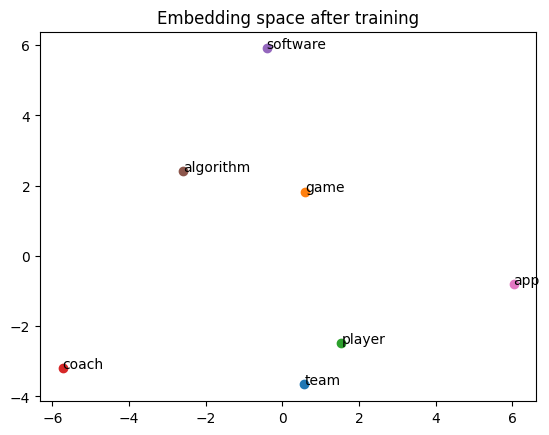

In [16]:
words = ["team","game","player","coach","software","algorithm","app"]

vecs = np.vstack([emb_epoch20[word2idx[w]] for w in words])
p = PCA(2).fit_transform(vecs)

for i,w in enumerate(words):
    plt.scatter(p[i,0], p[i,1])
    plt.text(p[i,0], p[i,1], w)

plt.title("Embedding space after training")
plt.show()